# Importing the libraries

In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import zipfile
seed_val = 123
tf.random.set_seed(seed_val)
np.random.seed(seed_val)

# Importing the Dataset

In [27]:
with zipfile.ZipFile("archive.zip", 'r') as archive:
    for file in archive.namelist():
        if file.startswith("raw-img/"):
            archive.extract(file)

# Preparing the Dataset

In [36]:
image_size = (128, 128)
batch_size = 128


# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory (
    "raw-img",
    seed = seed_val,
    validation_split = 0.2,
    subset = "training",
    batch_size = batch_size,
    image_size = image_size
)

val_ds = tf.keras.utils.image_dataset_from_directory (
    "raw-img",
    seed = seed_val,
    validation_split = 0.2,
    subset = "validation",
    batch_size = batch_size,
    image_size = image_size
)

animal_names = train_ds.class_names

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


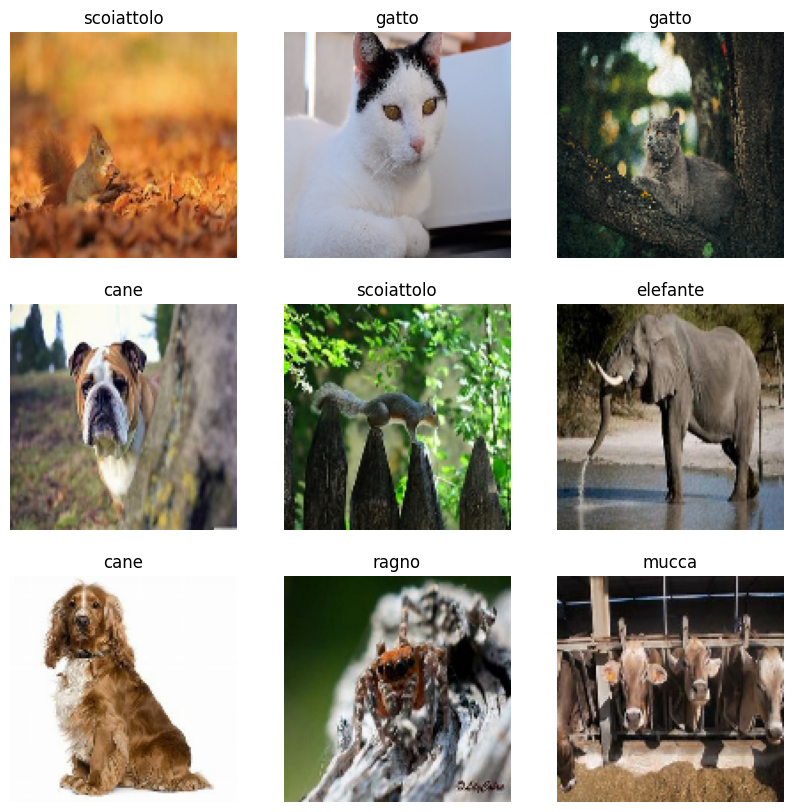

In [29]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3, i +1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(animal_names[labels[i]])
    plt.axis('off')

In [30]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(128, 128, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

c:\Users\richi\OneDrive\Documents\GitHub\CECS-456-Final\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


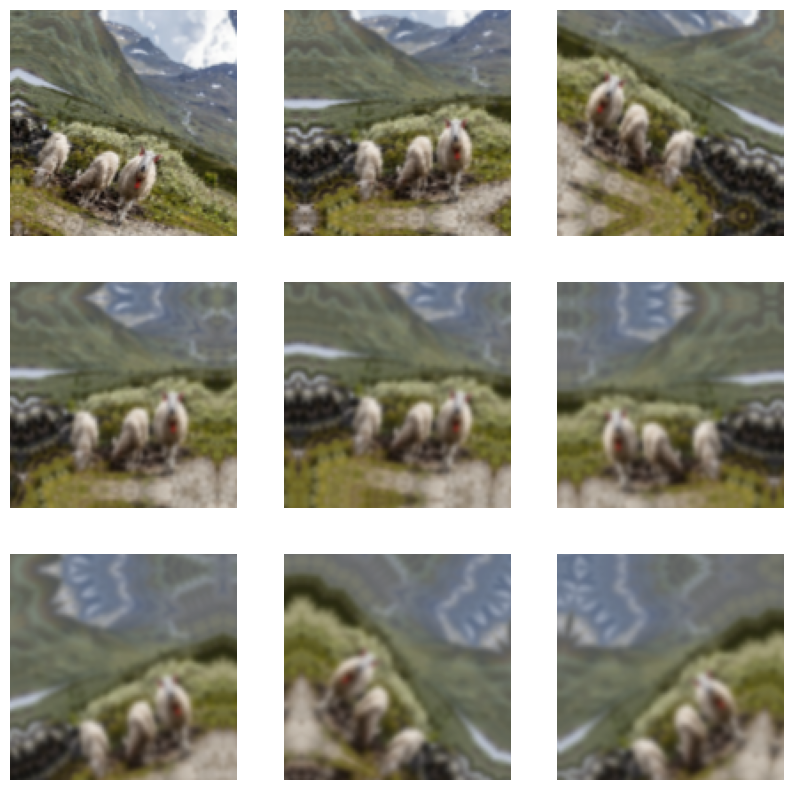

In [31]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    images = data_augmentation(images)
    plt.subplot(3,3, i +1)
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.axis('off')

#Train Model

In [33]:
model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # First Block
    tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "same"),
    # Second Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "same"),
    # Third Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "same"),
    # Fourth Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "same"),
    # Fifth Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 128, 128, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,105,466 (4.22 MB)

 Trainable params: 1,104,730 (4.21 MB)

 Non-trainable params: 736 (2.88 KB)

In [25]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.2865 - loss: 2.3872 - val_accuracy: 0.1866 - val_loss: 4.7807
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.4832 - loss: 1.5175 - val_accuracy: 0.2428 - val_loss: 2.6850
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - accuracy: 0.5480 - loss: 1.3090 - val_accuracy: 0.3343 - val_loss: 2.0800
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.5856 - loss: 1.1912 - val_accuracy: 0.5238 - val_loss: 1.3940
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.6200 - loss: 1.1129 - val_accuracy: 0.4008 - val_loss: 1.8786
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.6478 - loss: 1.0213 - val_accuracy: 0.4172 - val_loss: 1.8002
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 159ms/step - accuracy: 0.6752 - loss: 0.9593 - val_accuracy: 0.4474 - val_loss: 1.6660
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.6864 - loss: 0

#Evaluation

In [26]:
test_loss, test_accuracy = model.evaluate(train_ds)
print("Total loss on testing set:", test_loss)
print("Accuracy of testing set:", test_accuracy)

164/164 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.7675 - loss: 0.6939
Total loss on testing set: 0.6761236786842346
Accuracy of testing set: 0.7727749943733215


In [28]:
import pandas as pd

for images, labels in train_ds.take(1):  
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    predicted_animals = [animal_names[label] for label in predicted_labels[:15]]
    real_animals = [animal_names[label.numpy()] for label in labels[:15]]

    results = pd.DataFrame({
        'Predicted': predicted_animals,
        'Real': real_animals
    })
    print(results)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
     Predicted        Real
0        gatto       gatto
1         cane        cane
2   scoiattolo  scoiattolo
3        mucca       mucca
4     farfalla    farfalla
5        mucca       mucca
6         cane      pecora
7        ragno       ragno
8     elefante    elefante
9   scoiattolo  scoiattolo
10       gatto        cane
11        cane        cane
12    elefante    elefante
13    elefante    elefante
14     cavallo     cavallo
